In [57]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta
from o2_vix import get_fedwatchprob, get_range, get_cross_sec_avg, get_range_multi
os.chdir("C:/Users/zheng/Documents/Finance Research/")
plt.style.use('ggplot')

### Daily (10D) VIX, VIX Futures and FOMC

In [103]:
vix_10d = pd.read_csv("Data/filtered/vix_10d.csv")
vix_10d.shape

(3087, 5)

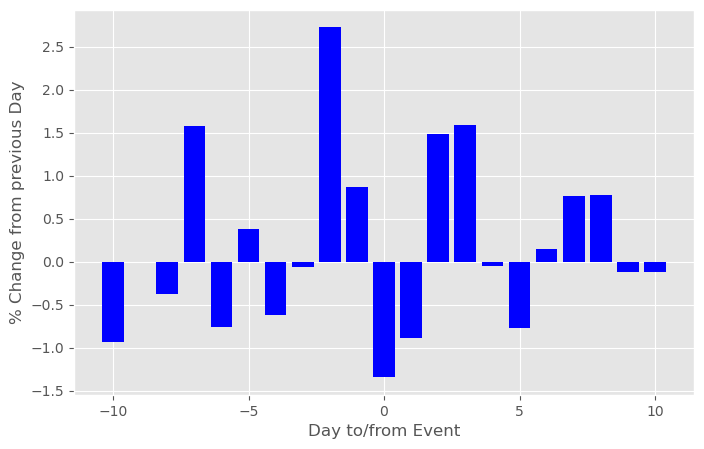

The Change % of T-7 is significant, degrees of freedom: 146
The Change % of T-2 is significant, degrees of freedom: 146
The Change % of T0 is significant, degrees of freedom: 146
The Change % of T2 is significant, degrees of freedom: 146
The Change % of T3 is significant, degrees of freedom: 146


,Datetime Label,Change %
0,-10,-0.940157
1,-9,-0.005510
2,-8,-0.371259
3,-7,1.579781
4,-6,-0.766427
5,-5,0.380802
6,-4,-0.622325
7,-3,-0.057249
8,-2,2.726038
9,-1,0.870924


In [5]:
get_cross_sec_avg(vix_10d, pct_change=False, freq='Day')

In [6]:
vix_fut_10d = pd.read_csv("Data/filtered/vix_fut_10d.csv")
vix_fut_10d.head()

,Event Datetime,Datetime,Price,Open,High,Low,Datetime Label,Change %
0,2009-11-04,2009-10-20,24.55,24.65,24.95,24.33,-10,-0.405680
1,2009-11-04,2009-10-21,24.52,24.55,25.05,23.88,-9,-0.122200
2,2009-11-04,2009-10-22,23.63,24.52,25.23,23.63,-8,-3.629690
3,2009-11-04,2009-10-23,24.08,23.63,24.38,23.40,-7,1.904359
4,2009-11-04,2009-10-26,24.58,24.08,25.17,23.48,-6,2.076412


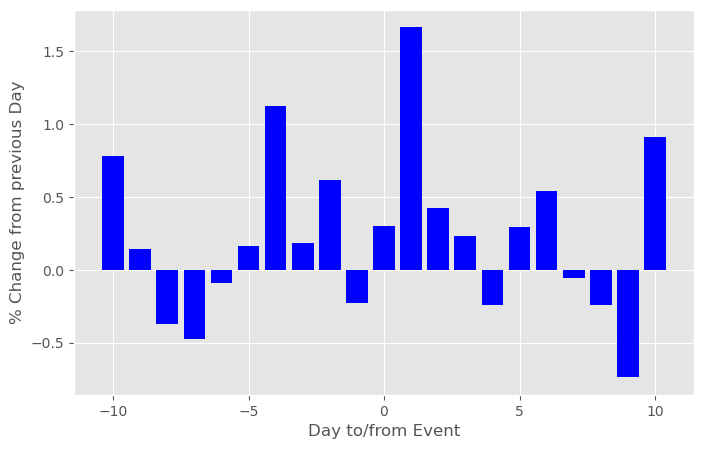

The Change % of T1 is significant, degrees of freedom: 96


,Datetime Label,Change %
0,-10,0.780530
1,-9,0.144940
2,-8,-0.373052
3,-7,-0.471964
4,-6,-0.093038
5,-5,0.160783
6,-4,1.123827
7,-3,0.181091
8,-2,0.618384
9,-1,-0.228012


In [7]:
get_cross_sec_avg(vix_fut_10d, pct_change=False, freq='Day')

In [9]:
vix_fut = pd.read_csv("Data/vix_futures/S&P 500 VIX Futures Historical Data.csv")
vix_fut['Datetime'] = pd.to_datetime(vix_fut["Date"], format="%m/%d/%Y") 
vix_fut = vix_fut.set_index("Datetime")
vix_fut.drop(['Date', 'Change %', 'Vol.'], axis = 1, inplace=True)
vix_fut.sort_index(inplace=True)
vix_fut.head()

,Price,Open,High,Low
Datetime,,,,
2009-10-14,23.23,23.52,23.63,22.75
2009-10-15,22.38,23.23,23.58,22.38
2009-10-16,22.38,22.38,23.15,22.08
2009-10-19,24.65,22.38,25.25,22.38
2009-10-20,24.55,24.65,24.95,24.33


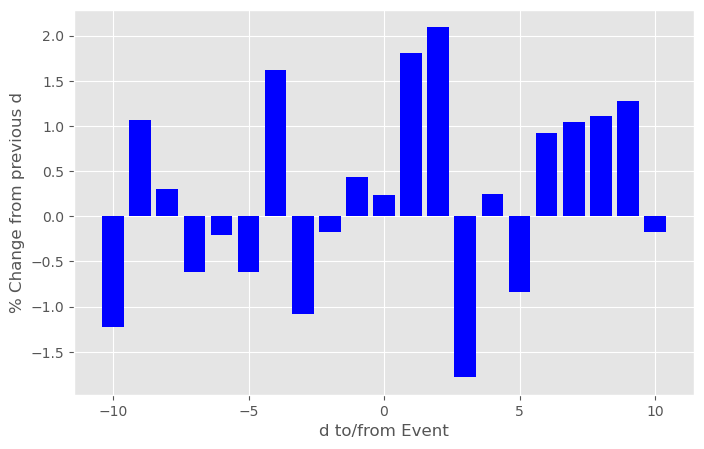

The Change % of T-10 is significant, degrees of freedom: 57
The Change % of T3 is significant, degrees of freedom: 57


,Datetime Label,Change %
0,-10,-1.225367
1,-9,1.070373
2,-8,0.296583
3,-7,-0.613116
4,-6,-0.203123
5,-5,-0.612984
6,-4,1.614140
7,-3,-1.085188
8,-2,-0.178709
9,-1,0.435165


In [10]:
# Select a random day of the month every 2 month and take a 10 days range around them
start = dt(2003, 8, 9)
random_dt = [start + relativedelta(months=+2*x) for x in range(120)]
vix_fut_10drand = get_range(vix_fut, random_dt, 10, 10, 'd')
get_cross_sec_avg(vix_fut_10drand)

In [11]:
# Other Macro events
event_df = pd.read_csv("Data/macro/data/macro/macro_announcement_dates_202112.csv")
for col in event_df.columns:
    event_df[col] = pd.to_datetime(event_df[col], format="%m/%d/%Y")
event_df.columns

Index(['Unemployment Rate', 'Consumer Price Index', 'Producer Price Index',
       'CFNAI', 'EIA', 'OPEC', 'IEA', 'Old_FOMC', 'New_FOMC',
       'GDP Annualized Advanced', 'GDP Annualized Preliminary',
       'GDP Annualized Final', 'Housing', 'Consumer Credit', 'ISM/NAPM',
       'IP/Capacity Utilization', 'Durable Goods Orders', 'Housing Starts',
       'Leading Indicators', 'Trade Balance', 'Advance Retail Sales',
       'Business Inventories', 'Construction Spending', 'Consumer Confidence',
       'Factory Orders', 'New Home Sales', 'Personal Consumption',
       'Monthly Budget Statement', 'Initial Jobless Claims',
       'Chicago Purchasing Manager Index', 'U. Michigan Consumer Confidence P',
       'U. Michigan Consumer Confidence F',
       'Actual fed funds target rate FFTR', 'Inflation'],
      dtype='object')

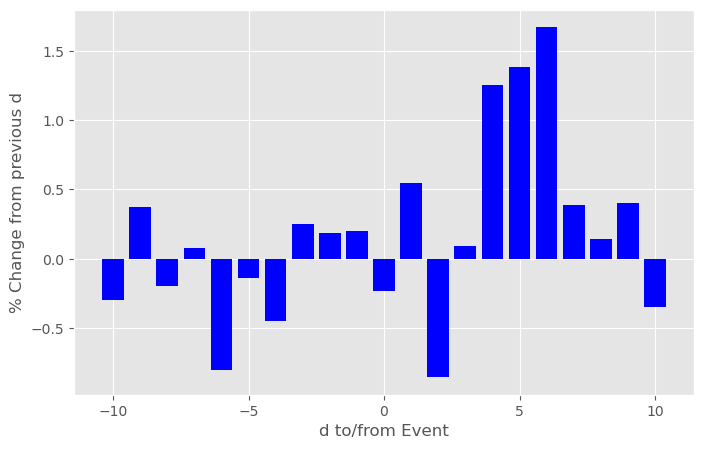

The Change % of T4 is significant, degrees of freedom: 143
The Change % of T5 is significant, degrees of freedom: 143
The Change % of T6 is significant, degrees of freedom: 143


,Datetime Label,Change %
0,-10,-0.296037
1,-9,0.373154
2,-8,-0.195654
3,-7,0.074586
4,-6,-0.802021
5,-5,-0.140079
6,-4,-0.449257
7,-3,0.249395
8,-2,0.182521
9,-1,0.202749


In [12]:
#CPI
cpi_dt = list(event_df['Consumer Price Index'].dropna())
vix_cpi_10drand = get_range(vix_fut, cpi_dt, 10, 10, 'd')
get_cross_sec_avg(vix_cpi_10drand)

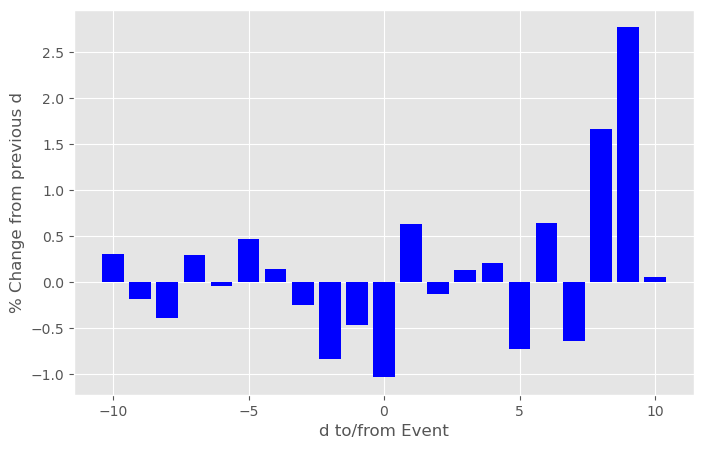

The Change % of T-2 is significant, degrees of freedom: 143
The Change % of T0 is significant, degrees of freedom: 143
The Change % of T8 is significant, degrees of freedom: 143
The Change % of T9 is significant, degrees of freedom: 143


,Datetime Label,Change %
0,-10,0.307354
1,-9,-0.182278
2,-8,-0.386978
3,-7,0.299657
4,-6,-0.035838
5,-5,0.469128
6,-4,0.143374
7,-3,-0.249840
8,-2,-0.829343
9,-1,-0.462149


In [13]:
# Unemployment Rate
ur_dt = list(event_df['Unemployment Rate'].dropna())
vix_ur_10drand = get_range(vix_fut, ur_dt, 10, 10, 'd')
get_cross_sec_avg(vix_ur_10drand)

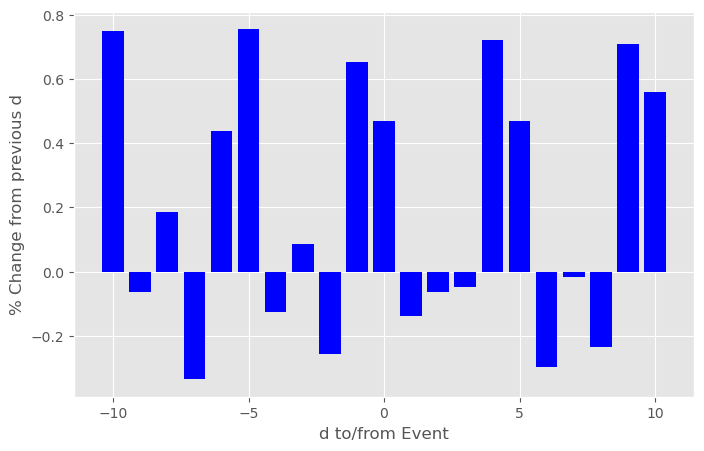

The Change % of T-10 is significant, degrees of freedom: 484
The Change % of T-5 is significant, degrees of freedom: 484
The Change % of T-1 is significant, degrees of freedom: 484
The Change % of T4 is significant, degrees of freedom: 484
The Change % of T9 is significant, degrees of freedom: 484


,Datetime Label,Change %
0,-10,0.750350
1,-9,-0.063548
2,-8,0.185351
3,-7,-0.335611
4,-6,0.436750
5,-5,0.755353
6,-4,-0.126227
7,-3,0.086115
8,-2,-0.255455
9,-1,0.652888


In [14]:
# Initial Jobless Claims
ijc_dt = list(event_df['Initial Jobless Claims'].dropna())
vix_ijc_10drand = get_range(vix_fut, ijc_dt, 10, 10, 'd')
get_cross_sec_avg(vix_ijc_10drand) 

### Hourly 10 Hours VIX, VIX Futures and FOMC

In [102]:
vix_10h = pd.read_csv("Data/filtered/vix_10h.csv")
vix_10h.shape

(3087, 5)

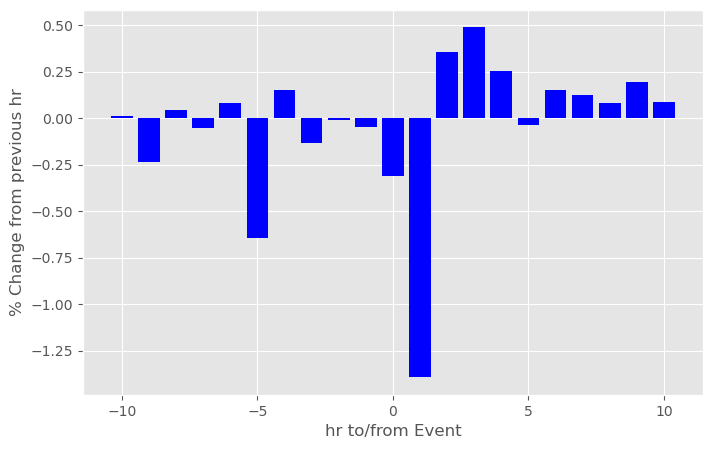

The Change % of T-9 is significant, degrees of freedom: 146
The Change % of T-5 is significant, degrees of freedom: 146
The Change % of T0 is significant, degrees of freedom: 146
The Change % of T1 is significant, degrees of freedom: 146


,Datetime Label,Change %
0,-10,0.010384
1,-9,-0.237034
2,-8,0.046132
3,-7,-0.052640
4,-6,0.080602
5,-5,-0.643703
6,-4,0.150699
7,-3,-0.134473
8,-2,-0.008964
9,-1,-0.048934


In [16]:
get_cross_sec_avg(vix_10h, pct_change=False, freq='hr')

In [105]:
vix_fut_10h = pd.read_csv("Data/filtered/vix_fut_10h.csv")
vix_fut_10h.shape

(1491, 21)

In [131]:
np.corrcoef(vix_fut_10h[vix_fut_10h['Datetime Label']==2]['Change %'], vix_fut_10h[vix_fut_10h['Datetime Label']==3]['Change %'])

array([[1.        , 0.26708337],
       [0.26708337, 1.        ]])

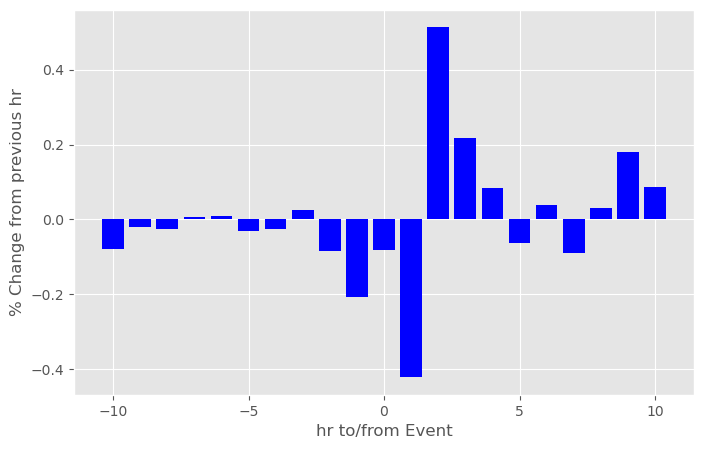

The Change % of T2 is significant, degrees of freedom: 70
The Change % of T9 is significant, degrees of freedom: 70


,Datetime Label,Change %
0,-10,-0.079501
1,-9,-0.019202
2,-8,-0.025833
3,-7,0.007033
4,-6,0.009099
5,-5,-0.031644
6,-4,-0.026057
7,-3,0.024107
8,-2,-0.084701
9,-1,-0.206001


In [18]:
get_cross_sec_avg(vix_fut_10h, pct_change=False, freq='hr')

In [19]:
#CPI
cpi_datetimes = event_df['Consumer Price Index'] + pd.Timedelta(hours=8.5)
cpi_datetimes = list(cpi_datetimes.dropna())
# cpi_datetimes
vix_cpi_10hrrand = get_range_multi(cpi_datetimes, 1, 20, '30min')
vix_cpi_10hrrand.head(43)
# get_cross_sec_avg(vix_cpi_10hrrand, price=True)
# vix_cpi_10hrrand

Symbol        Date  \
Event Datetime      Datetime                                 
2012-07-17 08:30:00 2012-07-13 15:00:00  VXQ12  07/13/2012   
                    2012-07-13 15:30:00  VXQ12  07/13/2012   
                    2012-07-13 16:00:00  VXQ12  07/13/2012   
                    2012-07-16 08:00:00  VXQ12  07/16/2012   
                    2012-07-16 08:30:00  VXQ12  07/16/2012   
                    2012-07-16 09:00:00  VXQ12  07/16/2012   
                    2012-07-16 09:30:00  VXQ12  07/16/2012   
                    2012-07-16 10:00:00  VXQ12  07/16/2012   
                    2012-07-16 10:30:00  VXQ12  07/16/2012   
                    2012-07-16 11:00:00  VXQ12  07/16/2012   
                    2012-07-16 11:30:00  VXQ12  07/16/2012   
                    2012-07-16 12:00:00  VXQ12  07/16/2012   
                    2012-07-16 12:30:00  VXQ12  07/16/2012   
                    2012-07-16 13:00:00  VXQ12  07/16/2012   
                    2012-07-16 13:30:00  VXQ12  07/16/2012   
                    2012-07-16 14:00:00  VXQ12  07/16/2012   
                    2012-07-16 14:30:00  VXQ12  07/16/2012   
                    2012-07-16 15:00:00  VXQ12  07/16/2012   
                    2012-07-16 15:30:00  VXQ12  07/16/2012   
                    2012-07-16 16:00:00  VXQ12  07/16/2012   
                    2012-07-17 08:00:00  VXQ12  07/17/2012   
                    2012-07-17 08:30:00  VXQ12  07/17/2012   
                    2012-07-17 09:00:00  VXQ12  07/17/2012   
                    2012-07-17 09:30:00  VXQ12  07/17/2012   
                    2012-07-17 10:00:00  VXQ12  07/17/2012   
                    2012-07-17 10:30:00  VXQ12  07/17/2012   
                    2012-07-17 11:00:00  VXQ12  07/17/2012   
                    2012-07-17 11:30:00  VXQ12  07/17/2012   
                    2012-07-17 12:00:00  VXQ12  07/17/2012   
                    2012-07-17 12:30:00  VXQ12  07/17/2012   
                    2012-07-17 13:00:00  VXQ12  07/17/2012   
                    2012-07-17 13:30:00  VXQ12  07/17/2012   
                    2012-07-17 14:00:00  VXQ12  07/17/2012   
                    2012-07-17 14:30:00  VXQ12  07/17/2012   
                    2012-07-17 15:00:00  VXQ12  07/17/2012   
                    2012-07-17 15:30:00  VXQ12  07/17/2012   
                    2012-07-17 16:00:00  VXQ12  07/17/2012   
                    2012-07-18 08:00:00  VXQ12  07/18/2012   
                    2012-07-18 08:30:00  VXQ12  07/18/2012   
                    2012-07-18 09:00:00  VXQ12  07/18/2012   
                    2012-07-18 09:30:00  VXQ12  07/18/2012   
                    2012-07-18 10:00:00  VXQ12  07/18/2012   
2012-08-15 08:30:00 2012-08-13 15:00:00  VXU12  08/13/2012   

                                                       Time  \
Event Datetime      Datetime                                  
2012-07-17 08:30:00 2012-07-13 15:00:00  15:00:00.000000000   
                    2012-07-13 15:30:00  15:30:00.000000000   
                    2012-07-13 16:00:00  16:00:00.000000000   
                    2012-07-16 08:00:00  08:05:00.000000000   
                    2012-07-16 08:30:00  08:30:00.000000000   
                    2012-07-16 09:00:00  09:00:00.000000000   
                    2012-07-16 09:30:00  09:30:00.000000000   
                    2012-07-16 10:00:00  10:00:00.000000000   
                    2012-07-16 10:30:00  10:30:00.000000000   
                    2012-07-16 11:00:00  11:00:00.000000000   
                    2012-07-16 11:30:00  11:30:00.000000000   
                    2012-07-16 12:00:00  12:00:00.000000000   
                    2012-07-16 12:30:00  12:30:00.000000000   
                    2012-07-16 13:00:00  13:00:00.000000000   
                    2012-07-16 13:30:00  13:30:00.000000000   
                    2012-07-16 14:00:00  14:00:00.000000000   
                    2012-07-16 14:30:00  14:30:00.000000000   
                    2012-07-16 15:00:00  15:00:00.00

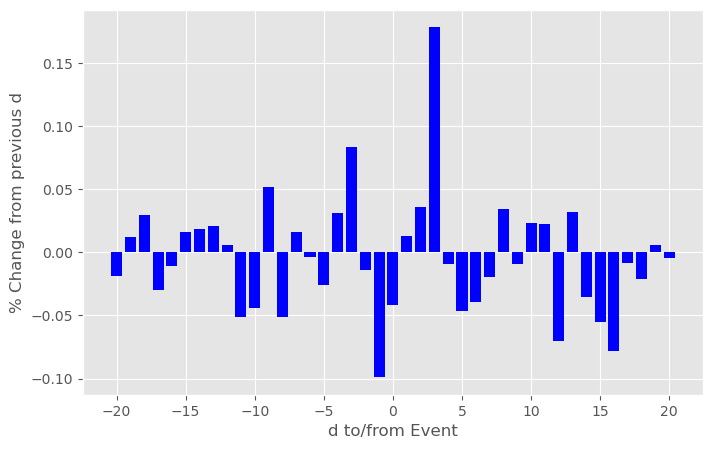

The Change % of T-3 is significant, degrees of freedom: 344
The Change % of T-1 is significant, degrees of freedom: 344
The Change % of T3 is significant, degrees of freedom: 344


,Datetime Label,Change %
0,-20,-0.018525
1,-19,0.012054
2,-18,0.029232
3,-17,-0.030042
4,-16,-0.010840
5,-15,0.016022
6,-14,0.018629
7,-13,0.021116
8,-12,0.005890
9,-11,-0.051422


In [20]:
ijr_datetimes = event_df['Initial Jobless Claims'] + pd.Timedelta(hours=8.5)
ijr_datetimes = list(ijr_datetimes.dropna())
# cpi_datetimes
vix_ijr_10hrrand = get_range_multi(ijr_datetimes, 1, 20, '30min')
get_cross_sec_avg(vix_ijr_10hrrand, price=True)

### Fed Watch Stratificiation

In [21]:
get_fedwatchprob(dt(2024, 8, 30), 1)

,WatchDate,FOMCDate,5.00-5.25,5.25-5.50
0,2024-08-30,2024-09-18,0.68,0.32


In [22]:
effr = pd.read_csv('Data/effr.csv')
effr['Effective Date'] = pd.to_datetime(effr['Effective Date'], format="%m/%d/%Y")
effr.shape

(5452, 19)

In [23]:
fwprob = pd.read_csv("Data/fw_prob.csv")
fwprob.drop('Unnamed: 0', axis=1, inplace=True)
fwprob['WatchDate'] = pd.to_datetime(fwprob['WatchDate'], format="%Y-%m-%d")
fwprob.shape

(5364, 49)

In [44]:
# Because the fed watch futures data used by pyfedwatch is not complete
fomc_dates = vix_10d['Event Datetime'].unique()
fomc_dates = pd.to_datetime(fomc_dates, format="%Y-%m-%d")
fomc_dates

DatetimeIndex(['2003-08-12', '2003-09-16', '2003-10-28', '2003-12-09',
               '2004-01-28', '2004-03-16', '2004-05-04', '2004-06-30',
               '2004-08-10', '2004-09-21',
               ...
               '2020-11-05', '2020-12-16', '2021-01-27', '2021-03-17',
               '2021-04-28', '2021-06-16', '2021-07-28', '2021-09-22',
               '2021-11-03', '2021-12-15'],
              dtype='datetime64[ns]', length=147, freq=None)

In [72]:
effr_fwprob = effr.merge(fwprob, how='left', left_on = 'Effective Date', right_on = 'WatchDate')
effr_fwprob.head()

,Effective Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),Target Rate From (%),Target Rate To (%),...,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,3.25,3.00
0,2024-09-05,EFFR,5.33,5.31,5.32,5.33,5.35,102.0,5.25,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-09-04,EFFR,5.33,5.31,5.32,5.33,5.35,103.0,5.25,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-03,EFFR,5.33,5.31,5.32,5.33,5.35,100.0,5.25,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-08-30,EFFR,5.33,5.31,5.32,5.33,5.35,89.0,5.25,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-08-29,EFFR,5.33,5.31,5.32,5.33,5.35,97.0,5.25,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Uncertainty 1: Does not exist a big difference in estimated probaility days leading up to the coming fomc meeting

In [73]:
effr_fwprob = effr_fwprob.dropna(axis=1, how='all')
effr_fwprob = pd.concat([effr_fwprob[['Effective Date', 'Rate (%)', 'Target Rate From (%)', 'Target Rate To (%)']],
                  effr_fwprob.iloc[:, 15:]], axis=1)
effr_fwprob.tail()

,Effective Date,Rate (%),Target Rate From (%),Target Rate To (%),WatchDate,FOMCDate,5.00-5.25,5.25-5.50,5.50-5.75,4.75-5.00,...,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,3.25,3.00
5447,2003-01-07,1.20,1.25,NaN,2003-01-07,2003-01-29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5448,2003-01-06,1.22,1.25,NaN,2003-01-06,2003-01-29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5449,2003-01-03,1.12,1.25,NaN,2003-01-03,2003-01-29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5450,2003-01-02,1.30,1.25,NaN,2003-01-02,2003-01-29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5451,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
effr_fwprob.set_index('Effective Date', inplace=True)
fomc_index = [effr_fwprob.index.get_loc(x) for x in fomc_dates]

In [81]:
# filter for the days before FOMC day
filt_rows = [effr_fwprob.iloc[x+1:x+2, :].reset_index() for x in fomc_index]
effr_fwprob_prefomc = pd.concat(filt_rows, axis=0)
effr_fwprob_prefomc

,Effective Date,Rate (%),Target Rate From (%),Target Rate To (%),WatchDate,FOMCDate,5.00-5.25,5.25-5.50,5.50-5.75,4.75-5.00,...,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,3.25,3.00
0,2003-08-11,1.02,1.0,NaN,2003-08-11,2003-08-12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2003-09-15,1.11,1.0,NaN,2003-09-15,2003-10-28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2003-10-27,1.03,1.0,NaN,2003-10-27,2003-10-28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2003-12-08,0.99,1.0,NaN,2003-12-08,2003-12-09,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2004-01-27,1.02,1.0,NaN,2004-01-27,2004-01-28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2021-06-15,0.06,0.0,0.25,2021-06-15,2021-06-16,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2021-07-27,0.10,0.0,0.25,2021-07-27,2021-07-28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2021-09-21,0.08,0.0,0.25,2021-09-21,2021-09-22,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2021-11-02,0.08,0.0,0.25,2021-11-02,2021-11-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
effr_fwprob_prefomc['Uncertain'] = (effr_fwprob_prefomc.iloc[:, 7:] > 0.2).sum(axis=1) >= 2

In [87]:
effr_fwprob_prefomc = effr_fwprob_prefomc[effr_fwprob_prefomc['Uncertain'] == True]

In [86]:
effr_fwprob_prefomc[effr_fwprob_prefomc['Effective Date'] == dt(2019, 7, 30)].dropna(axis=1)

,Effective Date,Rate (%),Target Rate From (%),Target Rate To (%),WatchDate,FOMCDate,2.00-2.25,1.75-2.00,Uncertain
0,2019-07-30,2.39,2.25,2.5,2019-07-30,2019-07-31,0.770333,0.229667,True


In [108]:
uncertain_fomc = pd.to_datetime(effr_fwprob_prefomc['FOMCDate'], format="%Y-%m-%d") + pd.Timedelta(hours=14)
uncertain_fomc = [str(x) for x in uncertain_fomc]

In [125]:
uncertain_fomc

['2005-09-20 14:00:00',
 '2006-08-08 14:00:00',
 '2007-09-18 14:00:00',
 '2008-01-30 14:00:00',
 '2008-09-16 14:00:00',
 '2008-10-29 14:00:00',
 '2008-12-16 14:00:00',
 '2009-01-29 14:00:00',
 '2010-03-16 14:00:00',
 '2015-09-17 14:00:00',
 '2015-12-16 14:00:00',
 '2018-12-19 14:00:00',
 '2019-07-31 14:00:00']

In [110]:
vix_fut_10h_uncert = vix_fut_10h[vix_fut_10h['Event Datetime'].isin(uncertain_fomc)]

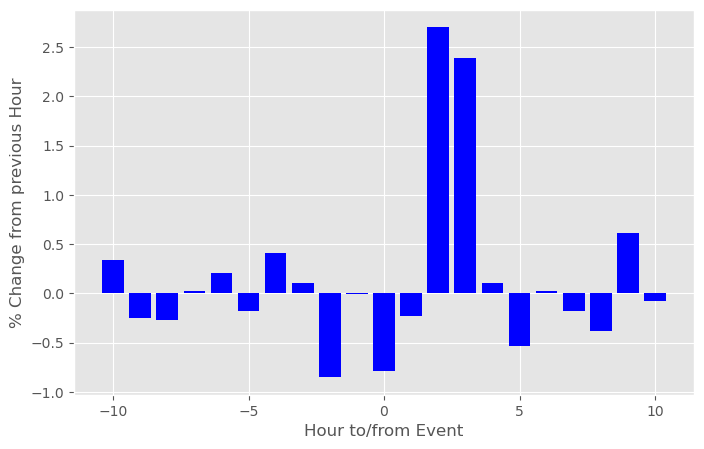

The Change % of T3 is significant, degrees of freedom: 3


,Datetime Label,Change %
0,-10,0.335041
1,-9,-0.245719
2,-8,-0.267154
3,-7,0.026647
4,-6,0.202772
5,-5,-0.179556
6,-4,0.410245
7,-3,0.107068
8,-2,-0.850773
9,-1,-0.007180


In [114]:
get_cross_sec_avg(vix_fut_10h_uncert, pct_change=False, freq='Hour')

In [112]:
vix_fut_10h_no_uncert = vix_fut_10h[vix_fut_10h['Event Datetime'].isin(uncertain_fomc) == False]

In [132]:
np.corrcoef(vix_fut_10h_no_uncert[vix_fut_10h_no_uncert['Datetime Label']==1]['Change %'], vix_fut_10h_no_uncert[vix_fut_10h_no_uncert['Datetime Label']==2]['Change %'])

array([[1.        , 0.18801657],
       [0.18801657, 1.        ]])

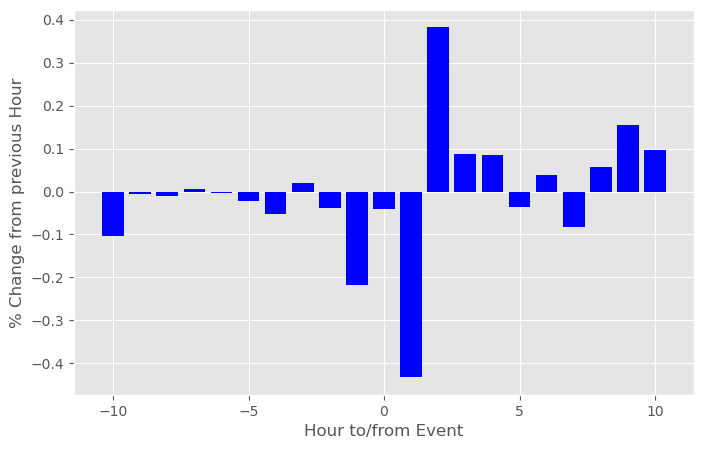

The Change % of T-1 is significant, degrees of freedom: 66
The Change % of T9 is significant, degrees of freedom: 66


,Datetime Label,Change %
0,-10,-0.104249
1,-9,-0.005678
2,-8,-0.011425
3,-7,0.005862
4,-6,-0.002463
5,-5,-0.022813
6,-4,-0.052105
7,-3,0.019155
8,-2,-0.038965
9,-1,-0.217871


In [115]:
get_cross_sec_avg(vix_fut_10h_no_uncert, pct_change=False, freq='Hour')

Uncertain 2: Day after FOMC, theres uncertainty in next FOMC adjustment probability 

In [121]:
filt_rows = [effr_fwprob.iloc[x-1:x, :].reset_index() for x in fomc_index]
effr_fwprob_postfomc = pd.concat(filt_rows, axis=0)
effr_fwprob_postfomc['Uncertain'] = (effr_fwprob_postfomc.iloc[:, 7:] > 0.2).sum(axis=1) >= 2
effr_fwprob_postfomc = effr_fwprob_postfomc[effr_fwprob_postfomc['Uncertain'] == True]
effr_fwprob_postfomc

,Effective Date,Rate (%),Target Rate From (%),Target Rate To (%),WatchDate,FOMCDate,5.00-5.25,5.25-5.50,5.50-5.75,4.75-5.00,...,4.00,4.25,4.50,4.75,5.00,5.25,5.50,3.25,3.00,Uncertain
0,2004-05-05,0.99,1.00,NaN,2004-05-05,2004-06-30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
0,2004-08-11,1.50,1.50,NaN,2004-08-11,2004-09-21,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
0,2004-09-22,1.78,1.75,NaN,2004-09-22,2004-11-10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
0,2005-03-23,2.73,2.75,NaN,2005-03-23,2005-05-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.222069,0.777931,True
0,2005-09-21,3.72,3.75,NaN,2005-09-21,2005-11-01,NaN,NaN,NaN,NaN,...,0.690833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
0,2006-03-29,4.69,4.75,NaN,2006-03-29,2006-05-10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.204286,0.795714,NaN,NaN,NaN,NaN,True
0,2006-05-11,4.99,5.00,NaN,2006-05-11,2006-06-29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.678571,0.321429,NaN,NaN,NaN,True
0,2006-06-30,5.05,5.25,NaN,2006-06-30,2006-08-08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.439123,0.560877,NaN,NaN,True
0,2007-09-19,4.74,4.75,NaN,2007-09-19,2007-10-31,NaN,NaN,NaN,NaN,...,NaN,NaN,0.682000,0.318000,NaN,NaN,NaN,NaN,NaN,True
0,2007-11-01,4.59,4.50,NaN,2007-11-01,2007-12-11,NaN,NaN,NaN,NaN,...,NaN,0.505517,0.494483,NaN,NaN,NaN,NaN,NaN,NaN,True


In [122]:
uncertain2_fomc = pd.to_datetime(effr_fwprob_postfomc['FOMCDate'], format="%Y-%m-%d") + pd.Timedelta(hours=14)
uncertain2_fomc = [str(x) for x in uncertain2_fomc]
vix_fut_10h_uncert2 = vix_fut_10h[vix_fut_10h['Event Datetime'].isin(uncertain2_fomc)]
vix_fut_10h_no_uncert2 = vix_fut_10h[vix_fut_10h['Event Datetime'].isin(uncertain2_fomc) == False]

In [126]:
uncertain2_fomc

['2004-06-30 14:00:00',
 '2004-09-21 14:00:00',
 '2004-11-10 14:00:00',
 '2005-05-03 14:00:00',
 '2005-11-01 14:00:00',
 '2006-05-10 14:00:00',
 '2006-06-29 14:00:00',
 '2006-08-08 14:00:00',
 '2007-10-31 14:00:00',
 '2007-12-11 14:00:00',
 '2008-03-18 14:00:00',
 '2008-04-30 14:00:00',
 '2008-10-29 14:00:00',
 '2015-09-17 14:00:00',
 '2015-12-16 14:00:00',
 '2016-12-14 14:00:00',
 '2017-06-14 14:00:00',
 '2018-12-19 14:00:00',
 '2019-07-31 14:00:00',
 '2019-10-30 14:00:00',
 '2019-12-11 14:00:00']

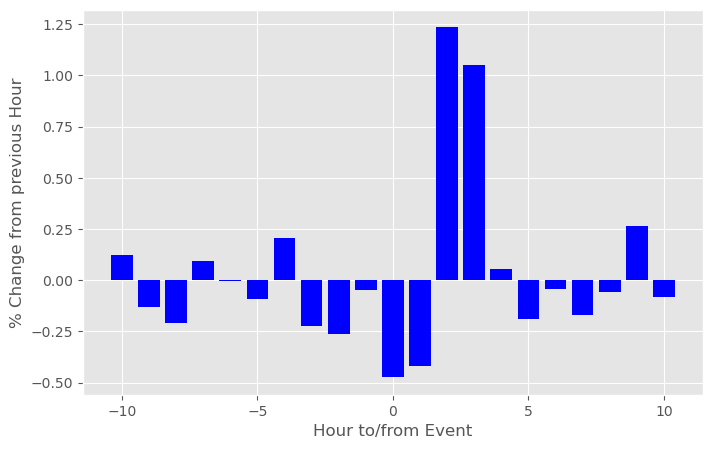

,Datetime Label,Change %
0,-10,0.124083
1,-9,-0.129765
2,-8,-0.210396
3,-7,0.093710
4,-6,-0.001553
5,-5,-0.089778
6,-4,0.208362
7,-3,-0.222786
8,-2,-0.263312
9,-1,-0.049030


In [123]:
get_cross_sec_avg(vix_fut_10h_uncert2, pct_change=False, freq='Hour')

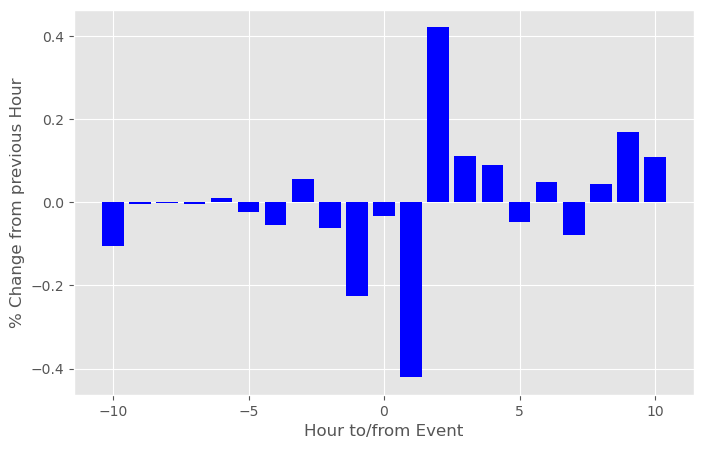

The Change % of T9 is significant, degrees of freedom: 62


,Datetime Label,Change %
0,-10,-0.105353
1,-9,-0.005162
2,-8,-0.002396
3,-7,-0.003973
4,-6,0.010452
5,-5,-0.024261
6,-4,-0.055825
7,-3,0.055459
8,-2,-0.062020
9,-1,-0.225934


In [124]:
get_cross_sec_avg(vix_fut_10h_no_uncert2, pct_change=False, freq='Hour')